# hw2: Решающие деревья

*Спасибо великому курсу великого Евгения Соколова*

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплементацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

Все данные, на которых будут обучаться модели, вы можете найти на диске.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Неэффективная и/или неоригинальная реализация кода может негативно отразиться на оценке.

### Формат сдачи
Заполненный ноутбук ```hw2-trees.ipynb``` и модуль с реализованными функциями и классами ```hw2code.py``` необходимо загрузить на свой Github. Затем нужно оставить комментарий в Google-таблице с оценками в столбце <<hw2>> в строке со своей фамилией о том, что вы выполнили работу с указанием ника на Kaggle. 

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [38]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [39]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

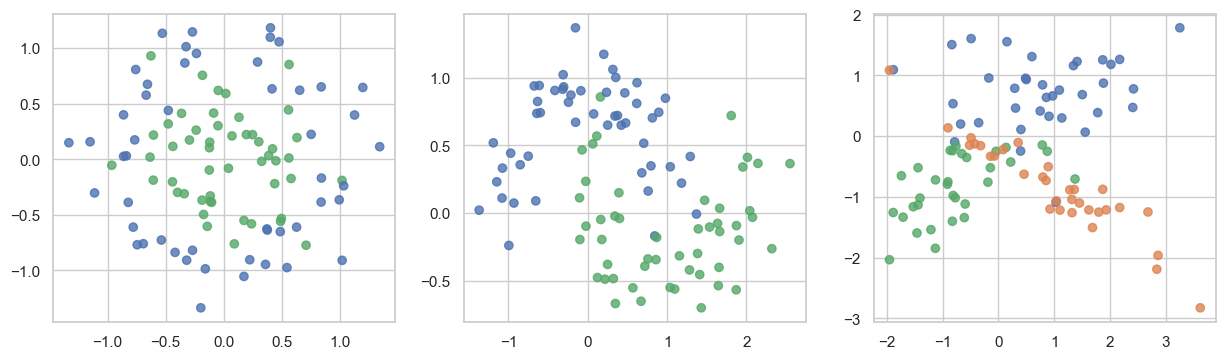

In [40]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [41]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

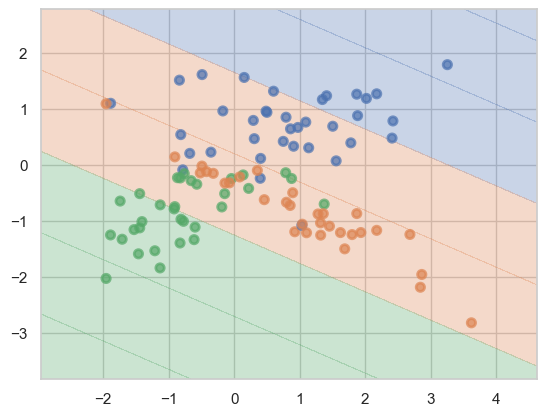

In [42]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Circles:
    Accuracy на обучающей выборке: 1.0000
    Accuracy на тестовой выборке: 0.8000
    Разница, переобучение: 0.2000

Moons:
    Accuracy на обучающей выборке: 1.0000
    Accuracy на тестовой выборке: 0.9600
    Разница, переобучение: 0.0400

Classification:
    Accuracy на обучающей выборке: 1.0000
    Accuracy на тестовой выборке: 0.7600
    Разница, переобучение: 0.2400



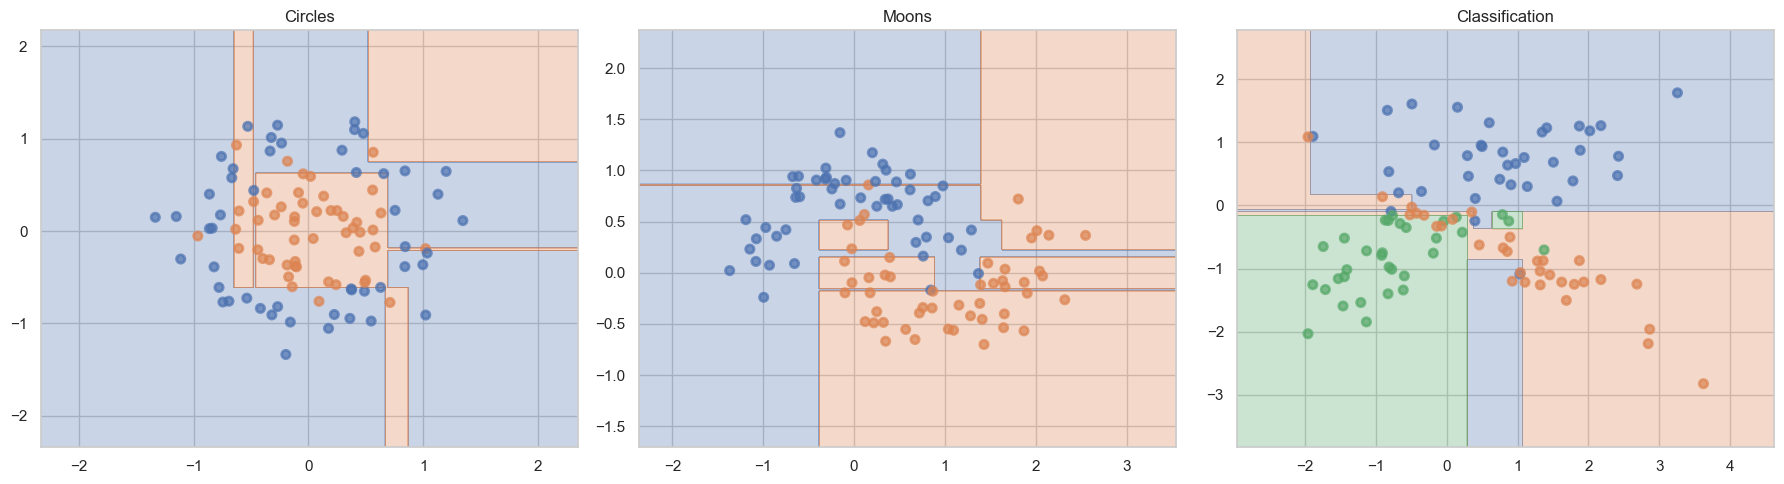

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

names = ['Circles', 'Moons', 'Classification']

plt.figure(figsize=(18, 5))

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y)
    
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, tree.predict(X_train))
    test_acc  = accuracy_score(y_test,  tree.predict(X_test))
    
    print(f"{names[i]}:")
    print(f"    Accuracy на обучающей выборке: {train_acc:.4f}")
    print(f"    Accuracy на тестовой выборке: {test_acc:.4f}")
    print(f"    Разница, переобучение: {train_acc - test_acc:.4f}\n")
    
    plt.subplot(1, 3, i + 1)
    plot_surface(tree, X, y)
    plt.title(f'{names[i]}')

plt.tight_layout()
plt.show()


__Ответ:__
Самое сильное переобучение у классификатора Classification (0.24), затем с небольшой разницей идет Circles (0.2) и самое маленькое переобучение имеет Moons (0.04)

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?


=== Circles ===
max_depth=1, min_samples_leaf=1: train_error=0.333, test_error=0.480
max_depth=1, min_samples_leaf=5: train_error=0.333, test_error=0.480
max_depth=1, min_samples_leaf=15: train_error=0.347, test_error=0.520
max_depth=3, min_samples_leaf=1: train_error=0.120, test_error=0.240
max_depth=3, min_samples_leaf=5: train_error=0.120, test_error=0.240
max_depth=3, min_samples_leaf=15: train_error=0.213, test_error=0.400
max_depth=5, min_samples_leaf=1: train_error=0.040, test_error=0.200
max_depth=5, min_samples_leaf=5: train_error=0.067, test_error=0.160
max_depth=5, min_samples_leaf=15: train_error=0.213, test_error=0.400


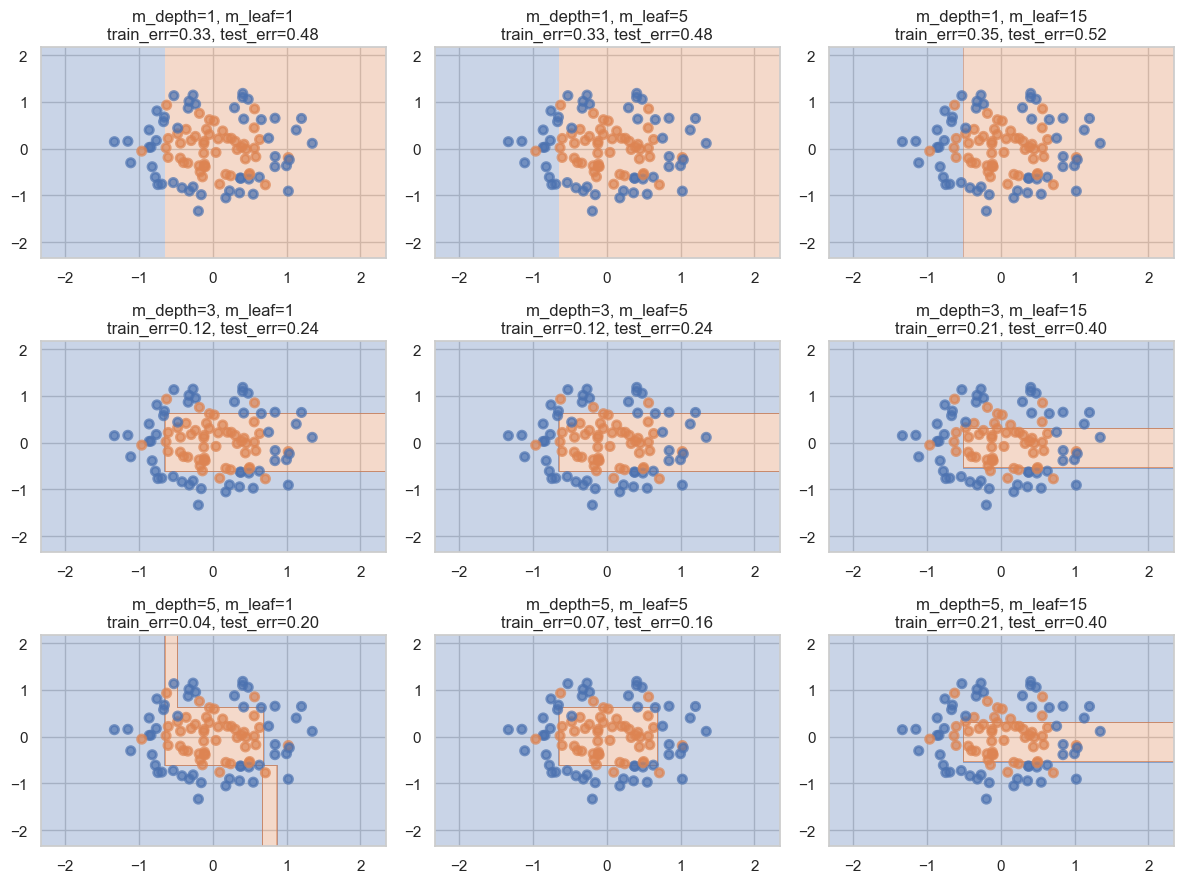


=== Moons ===
max_depth=1, min_samples_leaf=1: train_error=0.173, test_error=0.320
max_depth=1, min_samples_leaf=5: train_error=0.173, test_error=0.320
max_depth=1, min_samples_leaf=15: train_error=0.173, test_error=0.320
max_depth=3, min_samples_leaf=1: train_error=0.093, test_error=0.120
max_depth=3, min_samples_leaf=5: train_error=0.107, test_error=0.120
max_depth=3, min_samples_leaf=15: train_error=0.173, test_error=0.320
max_depth=5, min_samples_leaf=1: train_error=0.040, test_error=0.120
max_depth=5, min_samples_leaf=5: train_error=0.093, test_error=0.040
max_depth=5, min_samples_leaf=15: train_error=0.173, test_error=0.320


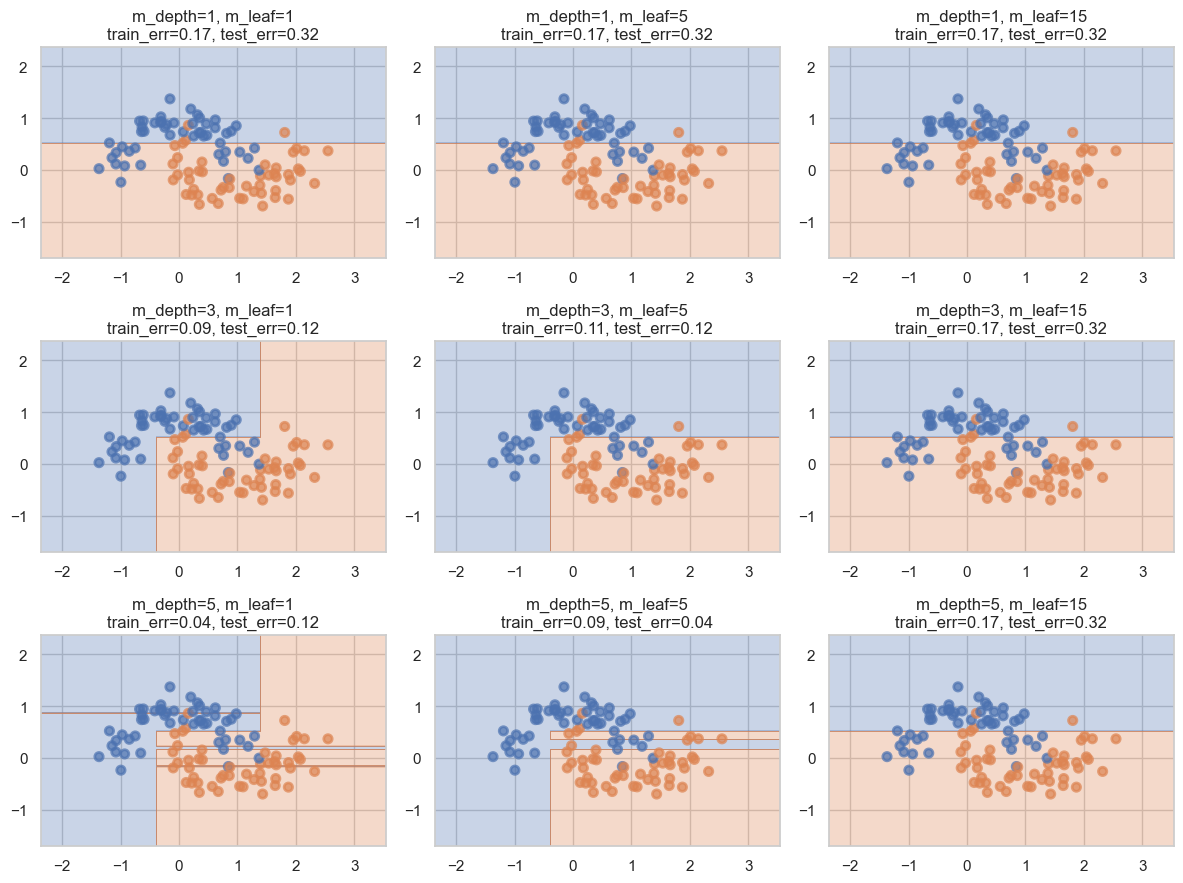


=== Classification ===
max_depth=1, min_samples_leaf=1: train_error=0.347, test_error=0.320
max_depth=1, min_samples_leaf=5: train_error=0.347, test_error=0.320
max_depth=1, min_samples_leaf=15: train_error=0.347, test_error=0.320
max_depth=3, min_samples_leaf=1: train_error=0.067, test_error=0.200
max_depth=3, min_samples_leaf=5: train_error=0.107, test_error=0.200
max_depth=3, min_samples_leaf=15: train_error=0.120, test_error=0.200
max_depth=5, min_samples_leaf=1: train_error=0.027, test_error=0.280
max_depth=5, min_samples_leaf=5: train_error=0.107, test_error=0.200
max_depth=5, min_samples_leaf=15: train_error=0.120, test_error=0.200


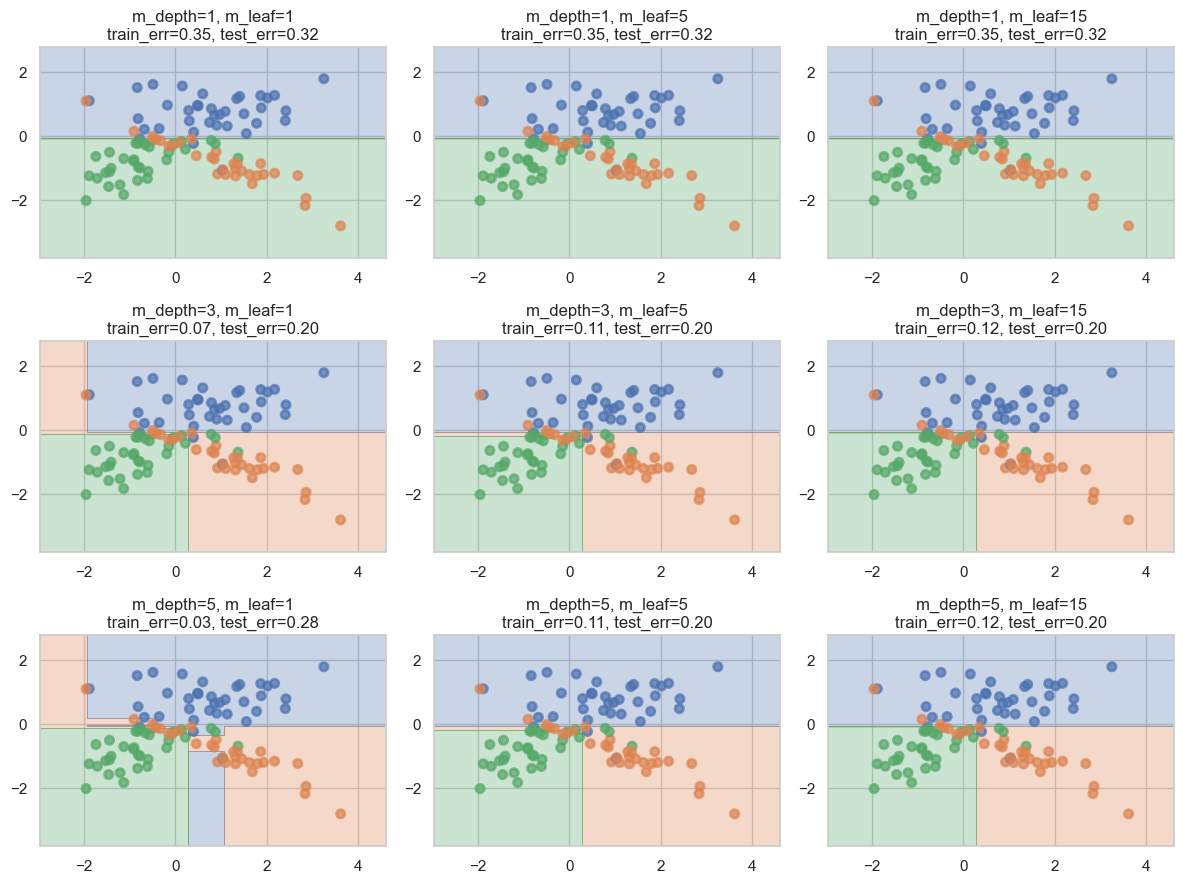

In [44]:
from math import ceil

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

names = ['Circles', 'Moons', 'Classification']

max_depth_list = [1, 3, 5]
min_leaf_list = [1, 5, 15]

n_cols = 3
n_plots = len(max_depth_list) * len(min_leaf_list)
n_rows = ceil(n_plots / n_cols)  

for i, (X, y) in enumerate(datasets):
    print(f'\n=== {names[i]} ===')
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y)
    
    plt.figure(figsize=(n_cols * 4, n_rows * 3))
    j = 1
    for md in max_depth_list:
        for ml in min_leaf_list:
            tree = DecisionTreeClassifier(max_depth=md, min_samples_leaf=ml, random_state=42)
            tree.fit(X_train, y_train)

            train_acc = accuracy_score(y_train, tree.predict(X_train))
            test_acc  = accuracy_score(y_test,  tree.predict(X_test))

            train_err = 1.0 - train_acc
            test_err  = 1.0 - test_acc

            print(f'max_depth={md}, min_samples_leaf={ml}: '
                  f'train_error={train_err:.3f}, test_error={test_err:.3f}')

            plt.subplot(n_rows, n_cols, j)
            plot_surface(tree, X, y)
            plt.title(f'm_depth={md}, m_leaf={ml}\n'
                      f'train_err={train_err:.2f}, test_err={test_err:.2f}')
            j += 1

    plt.tight_layout()
    plt.show()


__Ответ:__
Значения ошибок сильно зависят от структуры данных: для кругов лучше работает сочетание глубины 5 и размеров листов 1-5, для лун лучше дерево с глубиной 5 и размером листа 1, а для линейно разделимого датасета достаточно глубины 3, дальнейшее увеличении глубины даёт переобучение. При этом во всех случаях слишком маленькая глубина и слишком большие листья приводят к недообучению, а большая глубина с маленькими листьями к росту тестовой ошибки из‑за переобучения.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw2code.py

In [45]:
import numpy as np
#Определяем лучший порог для разбиения по критерию Джини среди всех возможных вариантов
def find_best_split(feature_vector, target_vector):
    order = np.argsort(feature_vector)
    x = feature_vector[order]
    y = target_vector[order]

    uniq_mask = np.diff(x) != 0
    if not np.any(uniq_mask):
        return np.array([]), np.array([]), None, None

    thresholds = (x[:-1][uniq_mask] + x[1:][uniq_mask]) / 2

    n = len(y)
    y0 = (y == 0).astype(int)
    y1 = (y == 1).astype(int)

    cum0 = np.cumsum(y0)[:-1][uniq_mask]
    cum1 = np.cumsum(y1)[:-1][uniq_mask]

    n_left = cum0 + cum1
    n_right = n - n_left

    mask = (n_left > 0) & (n_right > 0)
    thresholds = thresholds[mask]
    n_left = n_left[mask]
    n_right = n_right[mask]
    cum0 = cum0[mask]
    cum1 = cum1[mask]

    p0_left = cum0 / n_left
    p1_left = cum1 / n_left

    total0 = np.sum(y0)
    total1 = np.sum(y1)
    p0_right = (total0 - cum0) / n_right
    p1_right = (total1 - cum1) / n_right

    H_left = 1 - p0_left**2 - p1_left**2
    H_right = 1 - p0_right**2 - p1_right**2

    ginis = -(n_left / n) * H_left - (n_right / n) * H_right

    best_idx = np.argmax(ginis)
    threshold_best = thresholds[best_idx]
    gini_best = ginis[best_idx]

    return thresholds, ginis, threshold_best, gini_best


__Задание 4. (0.5 балла)__

Загрузите таблицу students.csv (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


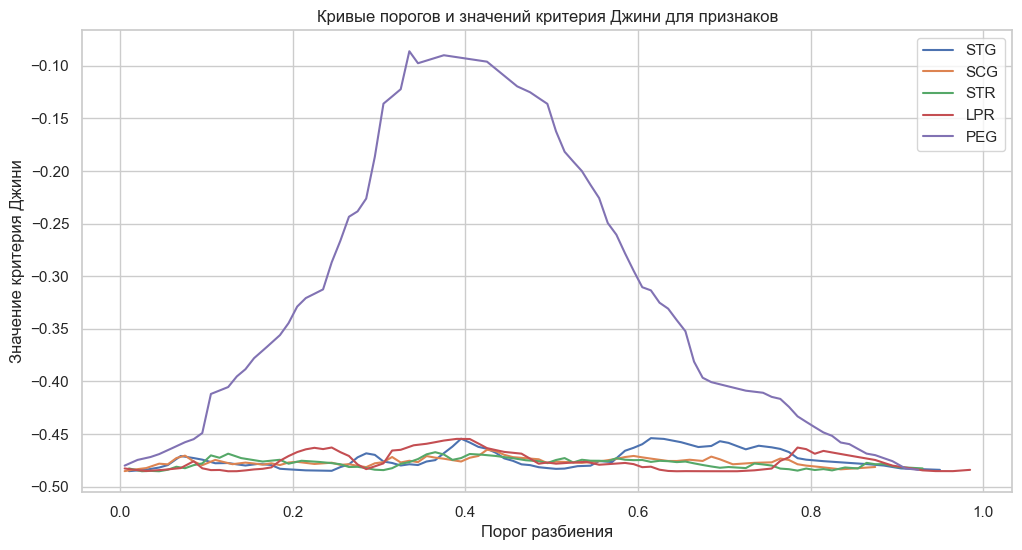

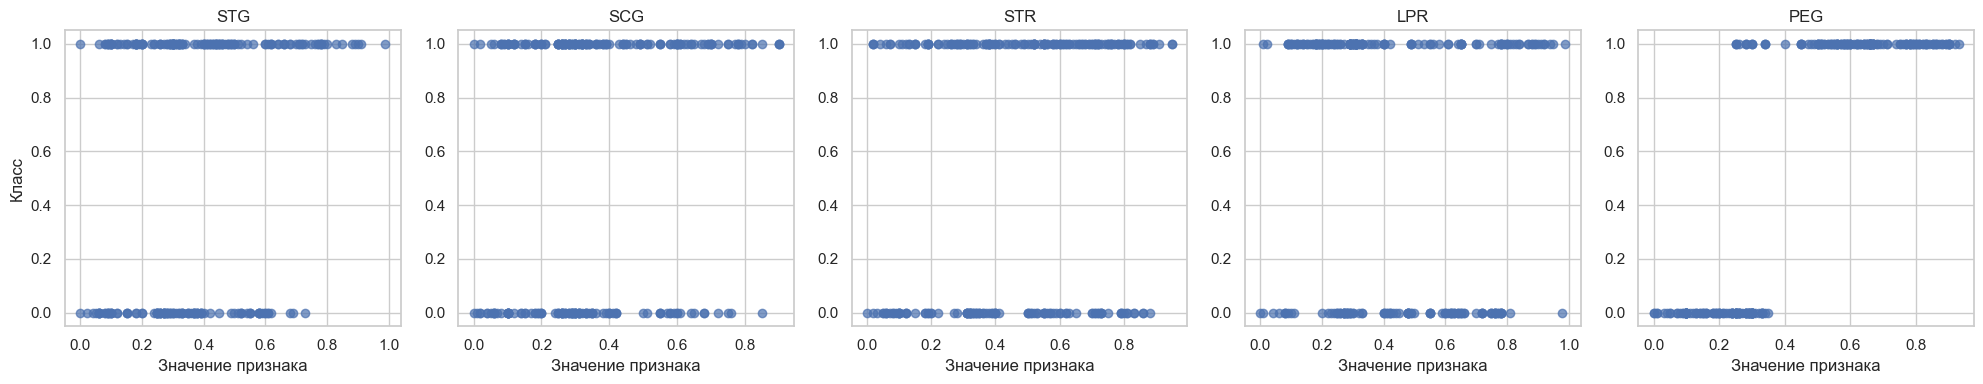

In [46]:
import numpy as np

#Определяем лучший порог для разбиения по критерию Джини среди всех возможных вариантов
def find_best_split(feature_vector, target_vector):
    order = np.argsort(feature_vector)
    x = feature_vector[order]
    y = target_vector[order]

    uniq_mask = np.diff(x) != 0
    if not np.any(uniq_mask):
        return np.array([]), np.array([]), None, None

    thresholds = (x[:-1][uniq_mask] + x[1:][uniq_mask]) / 2

    n = len(y)
    y0 = (y == 0).astype(int)
    y1 = (y == 1).astype(int)

    cum0 = np.cumsum(y0)[:-1][uniq_mask]
    cum1 = np.cumsum(y1)[:-1][uniq_mask]

    n_left = cum0 + cum1
    n_right = n - n_left

    mask = (n_left > 0) & (n_right > 0)
    thresholds = thresholds[mask]
    n_left = n_left[mask]
    n_right = n_right[mask]
    cum0 = cum0[mask]
    cum1 = cum1[mask]

    p0_left = cum0 / n_left
    p1_left = cum1 / n_left

    total0 = np.sum(y0)
    total1 = np.sum(y1)
    p0_right = (total0 - cum0) / n_right
    p1_right = (total1 - cum1) / n_right

    H_left = 1 - p0_left**2 - p1_left**2
    H_right = 1 - p0_right**2 - p1_right**2

    ginis = -(n_left / n) * H_left - (n_right / n) * H_right

    best_idx = np.argmax(ginis)
    threshold_best = thresholds[best_idx]
    gini_best = ginis[best_idx]

    return thresholds, ginis, threshold_best, gini_best


df = pd.read_csv("./datasets/students.csv")
display(df.head())

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
feature_names = df.columns[:-1]

plt.figure(figsize=(12, 6))

for i, name in enumerate(feature_names):
    feature = X[:, i]
    thresholds, ginis, best_thr, best_gini = find_best_split(feature, y)
    plt.plot(thresholds, ginis, label=f'{name}')

plt.title("Кривые порогов и значений критерия Джини для признаков")
plt.xlabel("Порог разбиения")
plt.ylabel("Значение критерия Джини")
plt.legend()
plt.grid(True)
plt.show()

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, name in enumerate(feature_names):
    axes[i].scatter(X[:, i], y, alpha=0.7)
    axes[i].set_title(name)
    axes[i].set_xlabel("Значение признака")
    if i == 0:
        axes[i].set_ylabel("Класс")

plt.tight_layout()
plt.show()


__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**
Деление стоит делать по признаку PEG, его кривая отличается, у остальных линии почти плоские. Это согласуется со scatter, по PEG классы 0 и 1 фактически разделяются по диапазону значений (есть порог между нижним скоплением нулей и верхним скоплением единиц), тогда как для STG, SCG, STR, LPR точки двух классов гораздо сильнее перемешаны. Для хорошего признака PEG кривая имеет ярко выраженный максимум/минимум вокруг одного порога, а для плохих признаков кривая почти ровная, без заметного лучшего порога.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw2code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».



 1. Было `if np.all(sub_y != sub_y[0])`, стало `if np.all(sub_y == sub_y[0])`, критерий должен срабатывать, когда все объекты в узле одного класса

2. Было смешение строк `"categorical"` и `"Categorical"`, стало везде `"categorical"`, иначе ветка для категориальных признаков частично не выполняется
  
3. Было `feature_vector = np.array(map(lambda x: categories_map[x], sub_X[:, feature]))`, стало `feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))`, в Python `map` возвращает итератор и его нужно явно превращать в список

4. Было `ratio[key] = current_count / current_click`, стало `ratio[key] = current_click / current_count`, сортировка категорий должна отражать долю единиц категории

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (лежит на гитхабе вместе с заданием), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [47]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from hw2code import DecisionTree

def get_tree_depth(node):
    if node["type"] == "terminal":
        return 0
    left_depth = get_tree_depth(node["left_child"])
    right_depth = get_tree_depth(node["right_child"])
    return 1 + max(left_depth, right_depth)

mush_df = pd.read_csv("agaricus-lepiota.data", header=None)
enc = LabelEncoder()
for j in mush_df.columns:
    mush_df[j] = enc.fit_transform(mush_df[j])

y = mush_df.iloc[:, 0].to_numpy()
X = mush_df.iloc[:, 1:].to_numpy()

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.5, random_state=42, stratify=y)

feat_types = ["categorical"] * X.shape[1]

clf = DecisionTree(feature_types=feat_types)
clf.fit(X_tr, y_tr)

y_pred = clf.predict(X_te)
acc = accuracy_score(y_te, y_pred)
print(f"ccuracy: {acc:.4f}")
depth = get_tree_depth(clf._tree)
print(f"Глубина: {depth}")

### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

ccuracy: 1.0000
Глубина: 7


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

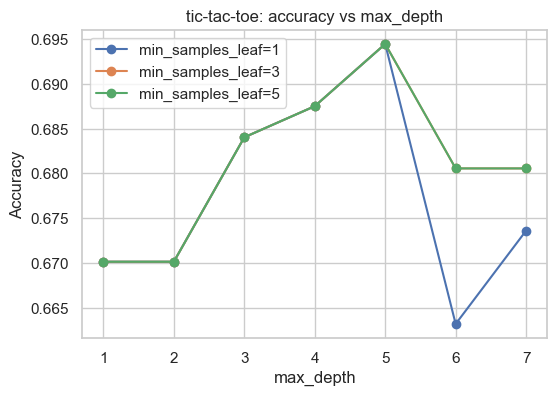

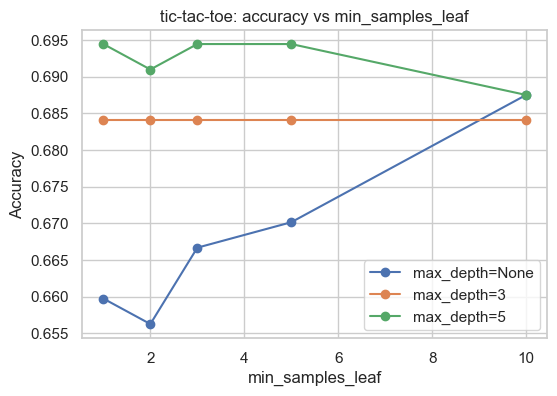

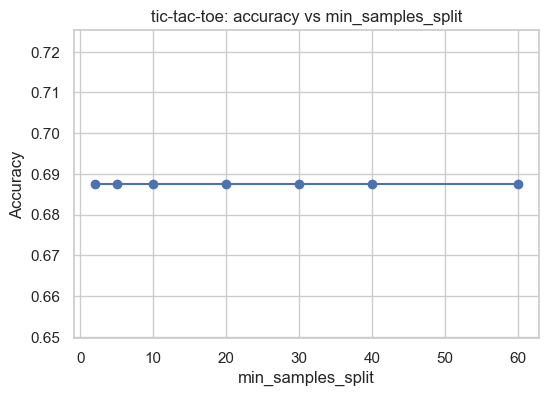

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from hw2code import DecisionTree


df = pd.read_csv("./datasets/tic-tac-toe-endgame.csv", header=None).dropna()

y_raw = df.iloc[:, -1].values
X_raw = df.iloc[:, :-1].values

le_y = LabelEncoder()
y = le_y.fit_transform(y_raw)

X = np.empty_like(X_raw, dtype=int)
for j in range(X_raw.shape[1]):
    le_col = LabelEncoder()
    X[:, j] = le_col.fit_transform(X_raw[:, j])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

feature_types = ["categorical"] * X.shape[1]
depth_values = [1, 2, 3, 4, 5, 6, 7]
leaf_options = [1, 3, 5]

plt.figure(figsize=(6, 4))
for leaf in leaf_options:
    acc = []
    for d in depth_values:
        tree = DecisionTree(feature_types=feature_types, max_depth=d, min_samples_split=2, min_samples_leaf=leaf)
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)
        acc.append(accuracy_score(y_test, y_pred))
    plt.plot(depth_values, acc, marker="o", label=f"min_samples_leaf={leaf}")

plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("tic-tac-toe: accuracy vs max_depth")
plt.grid(True)
plt.legend()
plt.show()

leaf_values = [1, 2, 3, 5, 10]
depth_options = [None, 3, 5]

plt.figure(figsize=(6, 4))
for d in depth_options:
    acc = []
    for leaf in leaf_values:
        tree = DecisionTree(feature_types=feature_types, max_depth=d, min_samples_split=2, min_samples_leaf=leaf)
        tree.fit(X_train, y_train)
        y_pred = tree.predict(X_test)
        acc.append(accuracy_score(y_test, y_pred))
    label = f"max_depth={d}" if d is not None else "max_depth=None"
    plt.plot(leaf_values, acc, marker="o", label=label)

plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("tic-tac-toe: accuracy vs min_samples_leaf")
plt.grid(True)
plt.legend()
plt.show()

split_values = [2, 5, 10, 20, 30, 40, 60]
acc_split = []

for m in split_values:
    tree = DecisionTree(feature_types=feature_types, max_depth=d, min_samples_split=2, min_samples_leaf=leaf)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    acc_split.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(6, 4))
plt.plot(split_values, acc_split, marker="o")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.title("tic-tac-toe: accuracy vs min_samples_split")
plt.grid(True)
plt.show()


__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [49]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from hw2code import DecisionTree

class TreeWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        self.feature_types = feature_types
        self.tree = None
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf

    def fit(self, X, y):
        self.tree = DecisionTree(feature_types=self.feature_types, max_depth=self.max_depth, min_samples_split=self.min_samples_split,
            min_samples_leaf=self.min_samples_leaf)
        self.tree.fit(X, y)
        return self

    def predict(self, X):
        return self.tree.predict(X)

def prepare_dataset(name):
    if name == "mushrooms":
        df = pd.read_csv("agaricus-lepiota.data", header=None)
        return df.iloc[:, 1:], LabelEncoder().fit_transform(df.iloc[:, 0])
    
    elif name == "tic-tac-toe":
        df = pd.read_csv("datasets/tic-tac-toe-endgame.csv")
        return df.iloc[:, :-1], LabelEncoder().fit_transform(df.iloc[:, -1])
    
    elif name == "cars":
        df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data", header=None)
        y_map = {'unacc': 0, 'acc': 0, 'good': 1, 'vgood': 1}
        y = df.iloc[:, -1].map(y_map).values
        return df.iloc[:, :-1], y
    
    elif name == "nursery":
        df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data", header=None)
        y_map = {'not_recom': 0, 'recommend': 0, 'very_recom': 1, 'priority': 1, 'spec_prior': 1}
        y = df.iloc[:, -1].map(y_map).values
        return df.iloc[:, :-1], y

datasets = ["mushrooms", "tic-tac-toe", "cars", "nursery"]
results = []

for ds_name in datasets:
    print(f"{ds_name}:")
    
    X_raw, y_raw = prepare_dataset(ds_name)
    X_le = X_raw.copy()
    for col in X_raw.columns:
        X_le[col] = LabelEncoder().fit_transform(X_raw[col].astype(str))
    X_le = X_le.values

    y = LabelEncoder().fit_transform(y_raw)
    ohe = OneHotEncoder(sparse_output=False)
    X_ohe = ohe.fit_transform(X_raw)
    
    models = [
        ("DT_Real", TreeWrapper(["real"] * X_le.shape[1])),
        ("DT_Cat", TreeWrapper(["categorical"] * X_le.shape[1])),
        ("DT_OHE", TreeWrapper(["real"] * X_ohe.shape[1])),
        ("Sklearn", DecisionTreeClassifier(random_state=42))]
    
    row = {"dataset": ds_name}
    
    for name, model in models:
        if "Sklearn" in name:
            score = cross_val_score(model, X_le, y, cv=10, scoring='accuracy').mean()
        else:
            score = cross_val_score(model, X_le if "OHE" not in name else X_ohe, y, cv=10, scoring='accuracy').mean()
        
        row[name] = score
        print(f"  {name}: {score:.4f}")
    
    results.append(row)

final_df = pd.DataFrame(results).set_index("dataset")
print("\nРезультаты:")
print(final_df.round(4))


mushrooms:
  DT_Real: 0.9993
  DT_Cat: 1.0000
  DT_OHE: 0.9996
  Sklearn: 0.9604
tic-tac-toe:
  DT_Real: 0.4675
  DT_Cat: 0.5414
  DT_OHE: 0.5436
  Sklearn: 0.7717
cars:
  DT_Real: 0.9426
  DT_Cat: 0.9675
  DT_OHE: 0.9195
  Sklearn: 0.9427
nursery:
  DT_Real: 0.9997
  DT_Cat: 0.9998
  DT_OHE: 0.9995
  Sklearn: 0.9997

Результаты:
             DT_Real  DT_Cat  DT_OHE  Sklearn
dataset                                      
mushrooms     0.9993  1.0000  0.9996   0.9604
tic-tac-toe   0.4675  0.5414  0.5436   0.7717
cars          0.9426  0.9675  0.9195   0.9427
nursery       0.9997  0.9998  0.9995   0.9997


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**
Ранжирование алгоритмов сильно различается по датасетам, на mushrooms и cars лидирует DT_Cat (1.000) за счёт сортировки категорий по вероятности класса, на tic-tac-toe лучший результат показывает Sklearn (0.789) против примерно 0.50 остальных.
Так происходит потому, что DT_Cat упорядочивает категории по доле класса 1 и сразу находит идеальные сплиты, DT_Real навязывает случайный порядок через, что требует лишних разбиений, DT_OHE взрывает размерность, приводя к переобучению, а Sklearn использует оптимизированные алгоритмы разделения с регуляризацией.​
Случайность возникает из разбиения на фолды в cross_val_score(cv=10). Её уменьшает фиксация random_state=42, увеличение cv или улутшением max_depth/min_samples_leaf.

Вывод: для датасетов с разрозненными категориями (mushrooms) критично target encoding, для комбинаторных задач (tic-tac-toe) надёжнее sklearn, все датасеты чисто категориальные поэтому деревья дают высокое качество.

Вставьте что угодно, описывающее ваши впечатления от этого задания:

In [ ]:
абоба